In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

In [3]:
train = pd.read_csv("Dataset/train_with_ext.csv")
test = pd.read_csv("Dataset/test_with_ext.csv")
ids = pd.read_csv("Dataset/test.csv")["id"]

In [4]:
train.shape, test.shape, ids.shape

((398648, 953), (127489, 952), (127489,))

In [5]:
train.head()

,Hour,node_awal_ways,node_akhir_ways,road_relation,road_node,max_speed,Day,node_awal_ways_minus_node_akhir_ways,road_type_Avenue,road_type_Hill,...,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33202557_20961237,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203760_18126978,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203760_20961349,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203777_1643665746,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203777_3796962982,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203791_20961349,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203791_20961350,id_jalan_id_titik_mulai_id_titik_akhir_97453767_3796962982_18126978,id_jalan_id_titik_mulai_id_titik_akhir_97453767_3796962982_33203777,rerata_kecepatan
0,1,3.0,3.0,13,5,30,6,0.0,0,0,...,0,0,0,0,0,0,0,0,0,29.126
1,1,3.0,2.0,10,53,30,6,1.0,0,0,...,0,0,0,0,0,0,0,0,0,46.576
2,1,3.0,2.0,4,62,20,6,1.0,0,0,...,0,0,0,0,0,0,0,0,0,36.587
3,1,2.0,2.0,11,12,20,6,0.0,0,1,...,0,0,0,0,0,0,0,0,0,34.063
4,1,2.0,2.0,4,3,30,6,0.0,0,0,...,0,0,0,0,0,0,0,0,0,38.336


In [6]:
test.head()

,Hour,node_awal_ways,node_akhir_ways,road_relation,road_node,max_speed,Day,node_awal_ways_minus_node_akhir_ways,road_type_Avenue,road_type_Hill,...,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33202557_20961236,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33202557_20961237,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203760_18126978,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203760_20961349,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203777_1643665746,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203777_3796962982,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203791_20961349,id_jalan_id_titik_mulai_id_titik_akhir_97453767_33203791_20961350,id_jalan_id_titik_mulai_id_titik_akhir_97453767_3796962982_18126978,id_jalan_id_titik_mulai_id_titik_akhir_97453767_3796962982_33203777
0,0,3.0,3.0,9,7,30,7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.0,2.0,13,11,30,7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,2.0,4,62,20,7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.0,2.0,13,11,30,7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,3.0,25,34,30,7,-1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def xgboost(train, test, test_ids):
    X = train.iloc[:, :-1]
    y = train.iloc[:, -1]

    model = xgb.XGBRFRegressor(tree_method="gpu_hist")

    # Perform cross-validation and get F1 scores for each fold
    cv_f1_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    
    print("Average MAPE Score:", np.mean(cv_f1_scores) * -1)

    model.fit(X, y)
    y_pred = model.predict(X)

    # Extract feature importance scores
    fi = model.feature_importances_

    X_train = train.iloc[:, :-1]
    X_test = test.iloc[:, :]
    y_train = train.iloc[:, -1]

    model = xgb.XGBRFRegressor(tree_method="gpu_hist")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    submission = pd.DataFrame({'id': test_ids, 'rerata_kecepatan': y_pred})

    # Normalize feature importance scores
    fi_normalized = fi / fi.sum()

    # Sort and select the top 20 features
    top_20_features = X_train.columns[fi_normalized.argsort()[::-1][:20]]
    top_20_normalized_importance = fi_normalized[fi_normalized.argsort()[::-1][:20]]

    plt.figure(figsize=(20, 7))
    plt.barh(top_20_features, top_20_normalized_importance)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.title("Top 20 Feature Importance")
    plt.grid()
    plt.tight_layout()
    plt.show()


    return submission, top_20_features, top_20_normalized_importance

Average MAPE Score: 0.1697413877687603


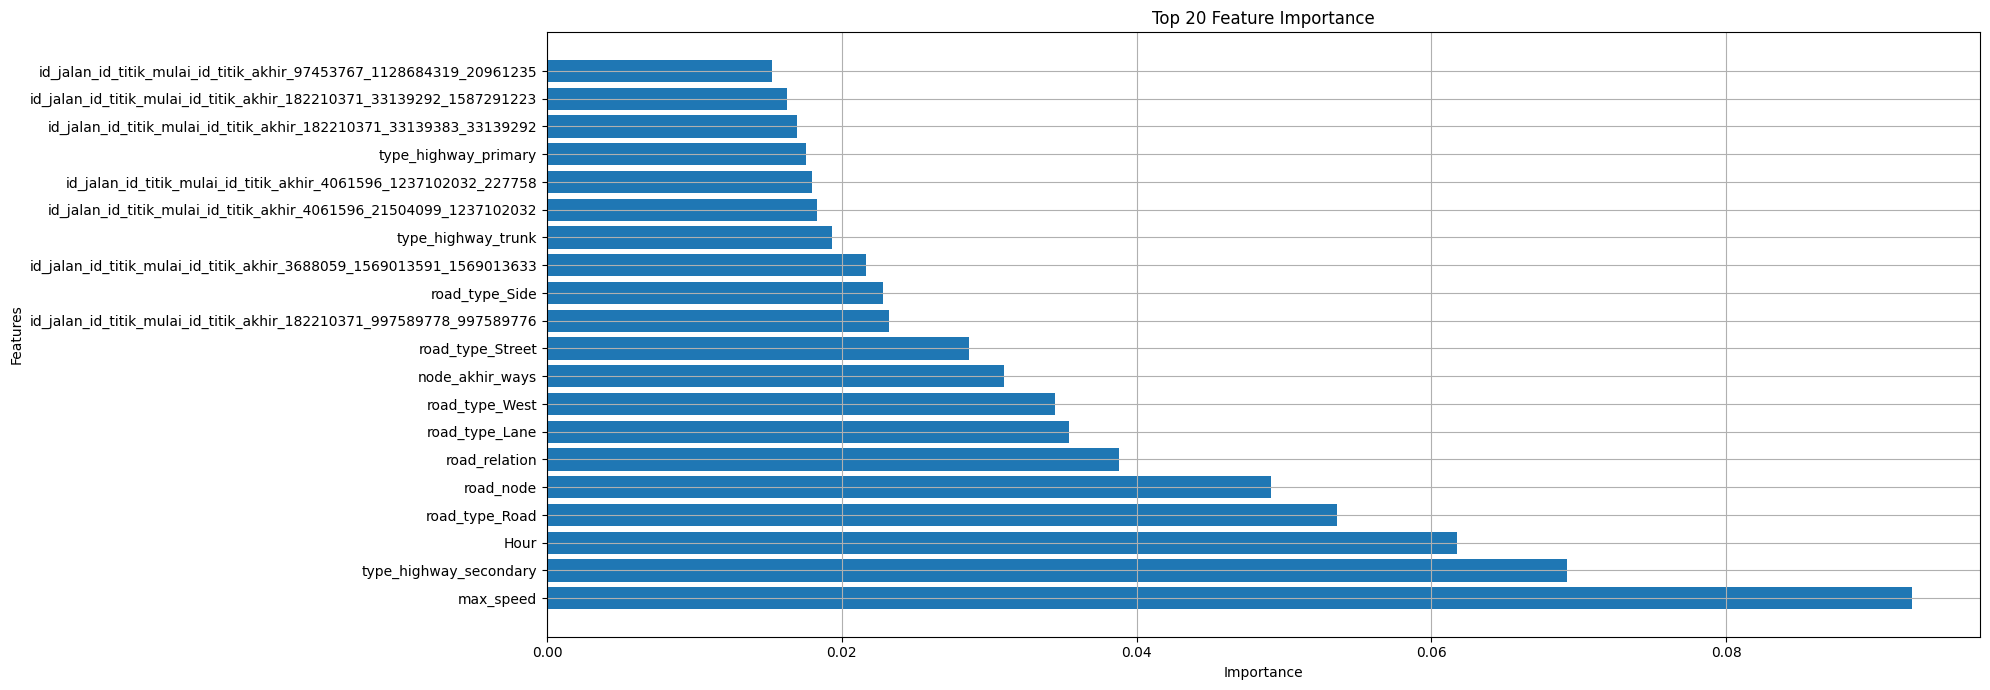

In [8]:
submission, top_20_features, top_20_normalized_importance = xgboost(train, test, ids)

In [10]:
submission.to_csv("Submission/baseline_ext_time.csv", index=False)

In [9]:
# Average MAPE Score: 0.2810435543849539 (no ext)
# ext (not using node in node out): Average MAPE Score: 0.25869988264791
# ext (with node in node out): Average MAPE Score: 0.2560736621430351 (but lowe on kaggle than ext (2))
# ext (with hour): Average MAPE Score: 0.1697413877687603 (worse than 2)